# インペイント
- 画像の中落書きを消したい時に使用する
    - 落書きの周囲のpixel情報を上手く使用してその落書きを塞いでいく 
- インペイントではマスク画像が必要になる
    - 落書きを塞ぐ(上書きする)画像

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
img = cv2.imread("data/src/Bus.jpg")
img_mask = cv2.imread("data/src/Mask.jpg", 0)  # グレースケール

In [13]:
cv2.imshow("Mask", img_mask)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Bus

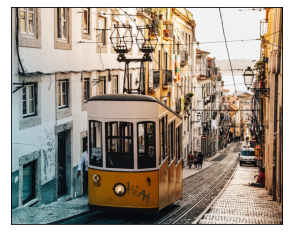

In [14]:
imgRGB = img[:, :, [2, 1, 0]] # BGR -> RGB変換
# plt.figure(figsize=(12, 8))
plt.imshow(imgRGB)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.show()           # 画像が重ならないように

### Mask

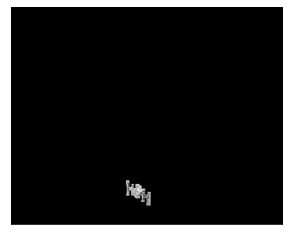

In [17]:
# imgRGB = img[:, :, [2, 1, 0]] # BGR -> RGB変換
# plt.figure(figsize=(12, 8))
plt.imshow(img_mask, cmap=plt.cm.gray)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.show()           # 画像が重ならないように

In [18]:
# マスク画像を2値化する
thresh = 1
ret, img_bin = cv2.threshold(img_mask, thresh, 255, cv2.THRESH_BINARY)
cv2.imshow("img", img_bin)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 2値化

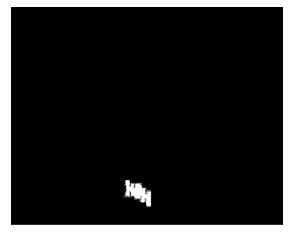

In [20]:
# imgRGB = img[:, :, [2, 1, 0]] # BGR -> RGB変換
# plt.figure(figsize=(12, 8))
plt.imshow(img_bin, cmap=plt.cm.gray)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.show()           # 画像が重ならないように

- bainary(バイナリー)の画像になる
    - 画素が入っているところだけを上手くインペイントを使用して修正する

In [21]:
# inpaint(インペイント)する / 修復する画像 : マスク画像 : どれくらいの情報を取り込むか : 手法
img_dst = cv2.inpaint(img, img_bin, 3, cv2.INPAINT_NS)
cv2.imshow("img", img)
cv2.imshow("inpaint", img_dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

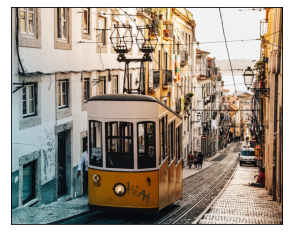

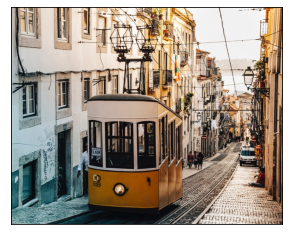

In [22]:
images = [img, img_dst]
for imgs in images:
    imgRGB = imgs[:, :, [2, 1, 0]] # BGR -> RGB変換
    # plt.figure(figsize=(12, 8))
    plt.imshow(imgRGB)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])
    plt.show()           # 画像が重ならないように

### inpaint 後の Bus

- マスク画像を使用して落書きを消すことができる
    - マスクの部分を徐々に周りの色に馴染むように置き換えていく処理を行なっている　 = inpaint(インペイント)